In [1]:
bulk=t(read.table('/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/TP53/clustering/TP53.bulk.csv',
              sep=',',header=TRUE,row.names=1))
head(bulk)

,A1BG,AATF,ABCA1,ABCD4,ABCG2,AC006262.5,AC009133.12,AC093673.5,ACAT2,ACTA2,...,ZC3H4,ZCCHC8,ZFP36,ZFP36L1,ZFPM1,ZMAT3,ZNF281,ZNF326,ZNF467,ZNF703
WT,-0.14809996,0.01757895,0.02047476,-0.008868065,0.139149904,0.15799753,0.11016354,0.009485614,0.03320252,0.20267448,...,0.012119318,-0.020311203,-0.020916117,0.20129561,0.058652453,0.105095468,0.0001854180,0.003444284,0.01539982,0.051203616
R337C,0.03811943,0.01773001,-0.00112811,0.057938095,-0.001064025,0.07838511,0.07348125,0.004731090,0.01458982,0.12944591,...,0.010950144,-0.008306894,0.002668709,0.01425493,0.041363105,0.048802335,0.0135059375,0.002987820,0.05547126,0.002625450
V31I,0.05836137,-0.14560956,0.10554066,-0.015841682,0.016689505,0.06145697,-0.02697083,0.031703934,0.08702531,0.07235575,...,-0.047683105,0.038798705,-0.065958284,0.03454877,-0.034208510,0.066657625,-0.0005352391,0.004484579,0.06743544,0.032978836
P36P,-0.03745259,-0.04050745,0.14321029,0.016772736,0.019903956,0.01543314,0.04551355,0.059617721,-0.02712082,0.14782310,...,-0.003636593,-0.002832487,0.017285153,0.06438248,-0.077895358,0.006161328,-0.0011984690,-0.045795593,0.04754731,-0.005845387
G360V,0.02287487,0.05295541,0.05986758,0.008931487,0.006093830,0.11721204,0.09829420,0.031434201,-0.01376072,0.08936287,...,-0.066470452,-0.058120094,0.044944137,-0.01509406,0.007714464,0.036091685,0.0131554985,-0.029843124,0.02077683,0.020822255
P47S,0.04491787,-0.07761575,0.11160699,0.006189583,0.028623668,0.16448575,0.04769701,0.010782879,0.06069173,0.12240756,...,-0.069724970,-0.066337839,-0.026789207,0.16370922,0.078701839,0.088878937,-0.0014269886,-0.031490441,0.02780147,0.060326122


In [2]:
length(rownames(bulk))

[1] 100

In [3]:
rownames(bulk)

[1] "WT"         "R337C"      "V31I"       "P36P"       "G360V"     
  [6] "P47S"       "L344L"      "P47P"       "T118T"      "T312S"     
 [11] "Y107H"      "T170T"      "P359P"      "P301P"      "P222P"     
 [16] "D21D"       "E2E"        "V216V"      "P295P"      "R158R"     
 [21] "P153P"      "A83V"       "Q5R"        "S366A"      "E339K"     
 [26] "P58R"       "C277F"      "R273L"      "R280T"      "R273C"     
 [31] "R280K"      "unassigned" "G154V"      "P250L"      "R213Q"     
 [36] "R158H"      "M246V"      "G105C"      "A159V"      "E271K"     
 [41] "V272L"      "R110L"      "S241F"      "R248L"      "R248W"     
 [46] "R273H"      "S241C"      "R337L"      "P152L"      "K132R"     
 [51] "Y205C"      "Y220C"      "Y234C"      "C238Y"      "C238F"     
 [56] "G266V"      "S127F"      "R158L"      "E285K"      "Y236C"     
 [61] "G266E"      "A159P"      "K132N"      "V216M"      "E286K"     
 [66] "G244C"      "V173L"      "P278L"      "H193Y"      "M237I"     
 [71] "G245C"      "C135Y"      "C242F"      "Y163C"      "H179R"     
 [76] "H214R"      "H193R"      "C176Y"      "P151S"      "G266R"     
 [81] "L194R"      "C275F"      "H193L"      "C275Y"      "R175H"     
 [86] "H179Y"      "G245V"      "R249M"      "R249S"      "G245D"     
 [91] "I195T"      "P278S"      "C135F"      "V173M"      "G245S"     
 [96] "V272M"      "R282W"      "C141Y"      "C176F"      "V157F"

In [4]:
scores_init=read.table('/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/TP53/scoring/TP53.scores_vs_P359P.csv',
                 sep=',',header=TRUE,row.names=1)
print(dim(scores_init))
rownames(scores_init)=scores_init[,'group2']
scores_init=scores_init[rownames(bulk),]
scores=data.frame(score=as.numeric(as.character(scores_init[,'HotellingT2'])))
rownames(scores)=scores_init[,'group2']
colnames(scores)='score'
head(scores)

[1] 100  11


,score
,<dbl>
WT,17.83040
R337C,70.28571
V31I,27.52608
P36P,23.19526
G360V,24.50642
P47S,34.00306


In [5]:
scores['P36P',]

[1] 23.19526

In [6]:
bulk_corr=cor(t(bulk),method='spearman')

In [7]:
x=bulk_corr
hc <- hclust(dist(x,method='manhattan'),method='complete')

In [8]:
options(repr.plot.width=20, repr.plot.height=4)

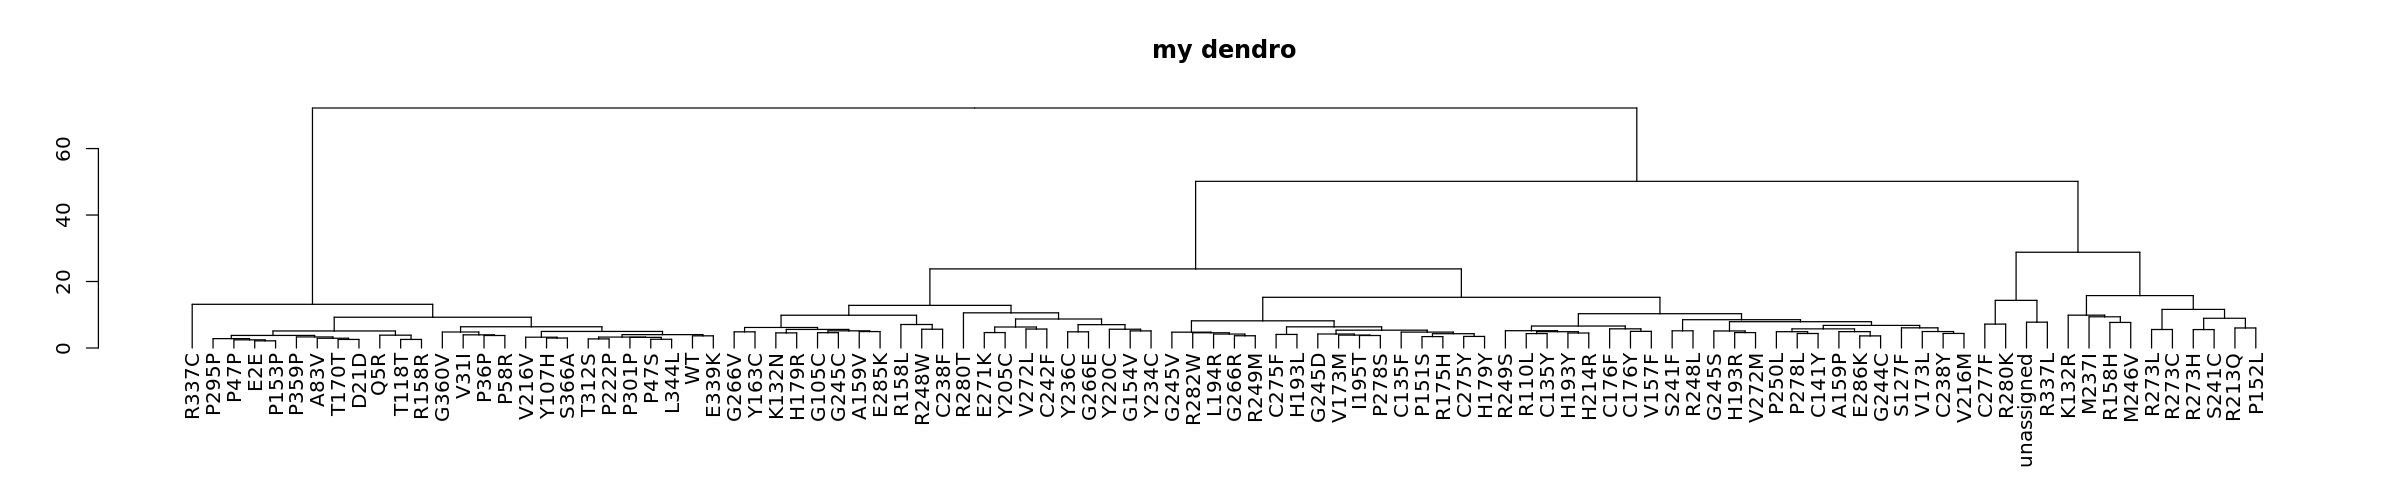

In [9]:
dd <- as.dendrogram(hc)
plot(dd, main = "my dendro")

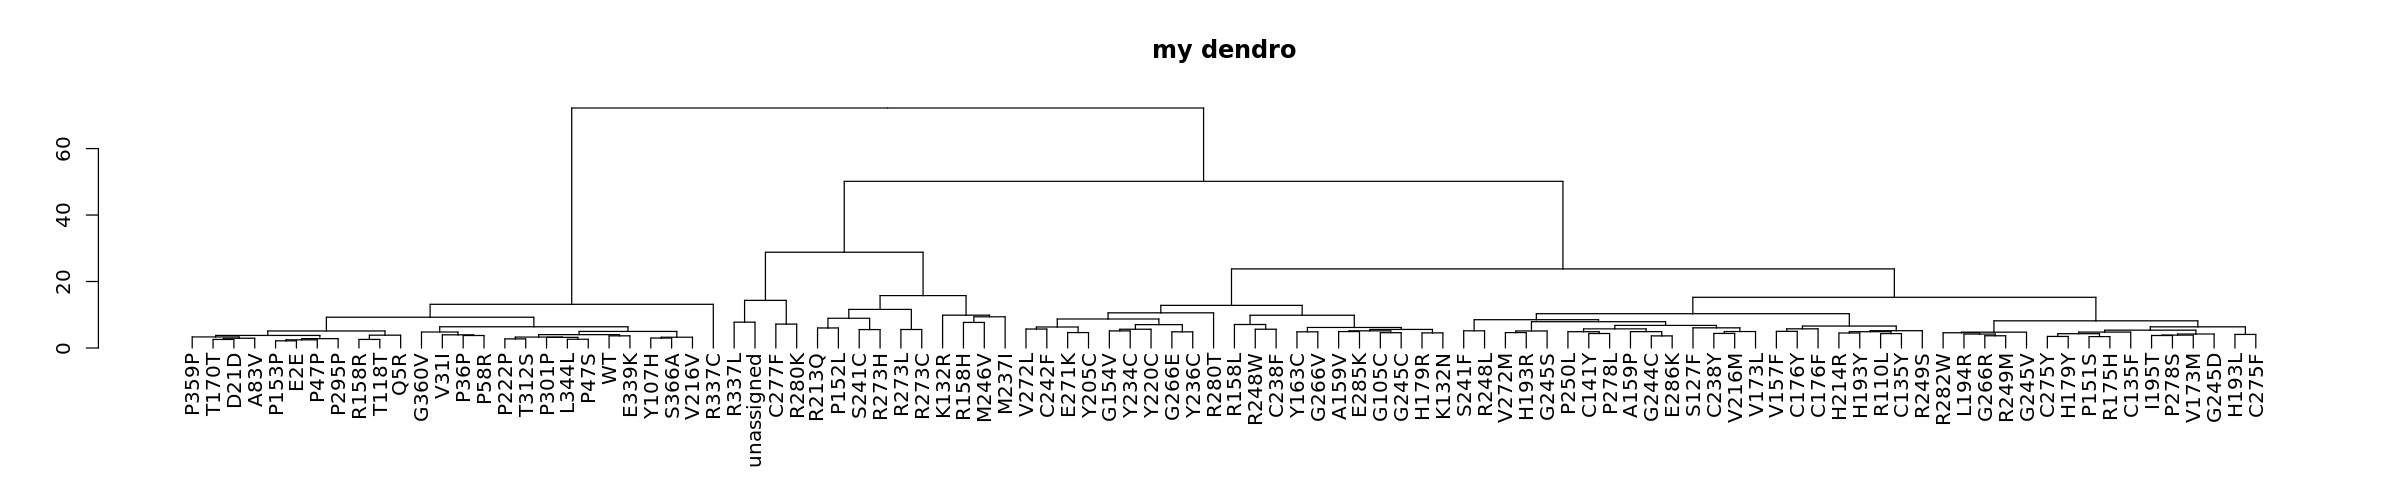

In [10]:
dd.reorder <- reorder(dd, wts=scores[rownames(x),'score'],agglo.FUN = mean)
plot(dd.reorder, main = "my dendro")

In [11]:
require(dendextend)

Loading required package: dendextend

Warning message:
"replacing previous import 'mclust::dmvnorm' by 'mvtnorm::dmvnorm' when loading 'fpc'"

---------------------
Welcome to dendextend version 1.8.0
Type citation('dendextend') for how to cite the package.

Type browseVignettes(package = 'dendextend') for the package vignette.
The github page is: https://github.com/talgalili/dendextend/

Suggestions and bug-reports can be submitted at: https://github.com/talgalili/dendextend/issues
Or contact: <tal.galili@gmail.com>

	To suppress this message use:  suppressPackageStartupMessages(library(dendextend))
---------------------



Attaching package: 'dendextend'


The following object is masked from 'package:stats':

    cutree




In [12]:
dend <- color_branches(dd.reorder, k=3) 

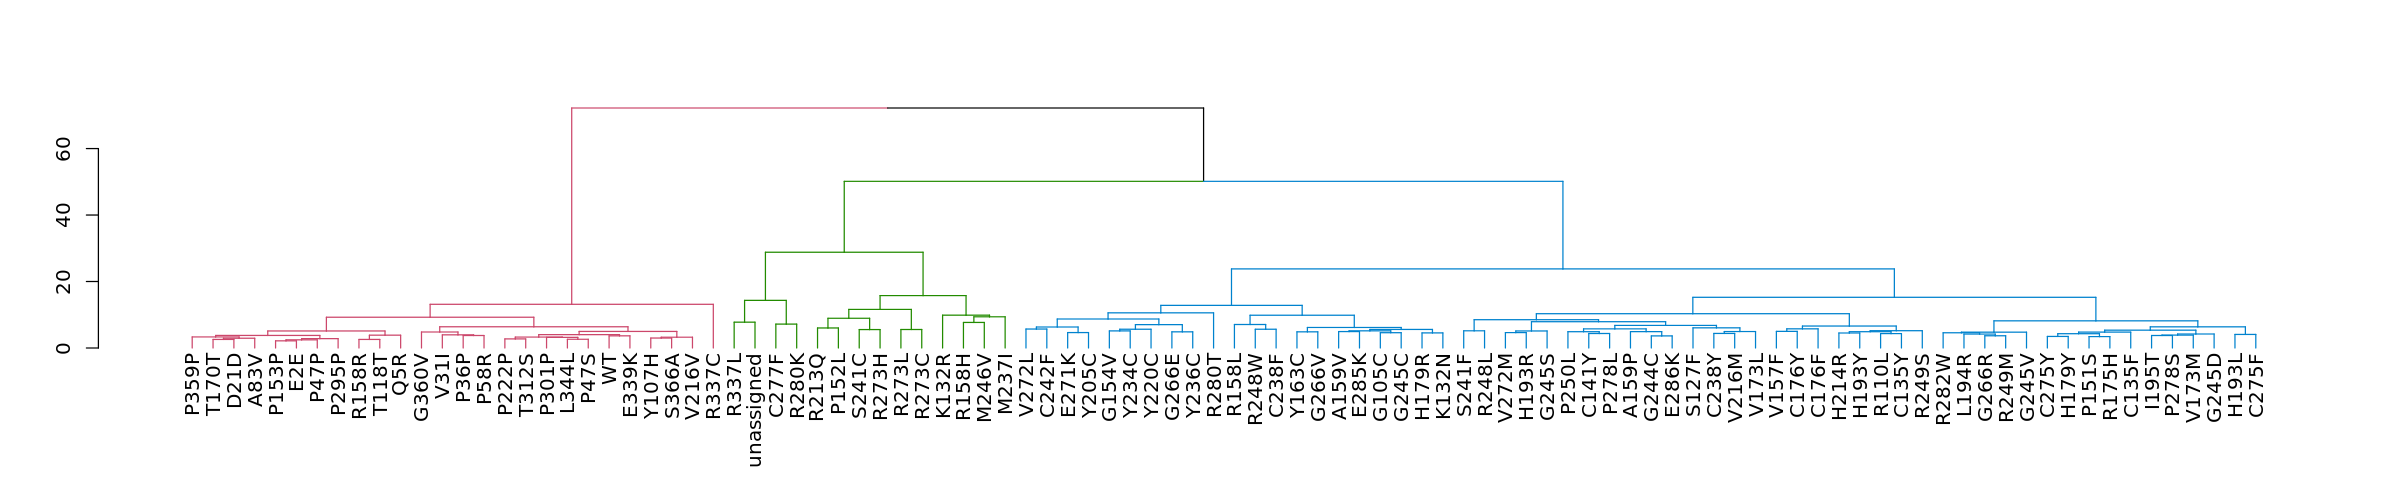

In [13]:
plot(dend,col=c('black','lightblue','blue'))

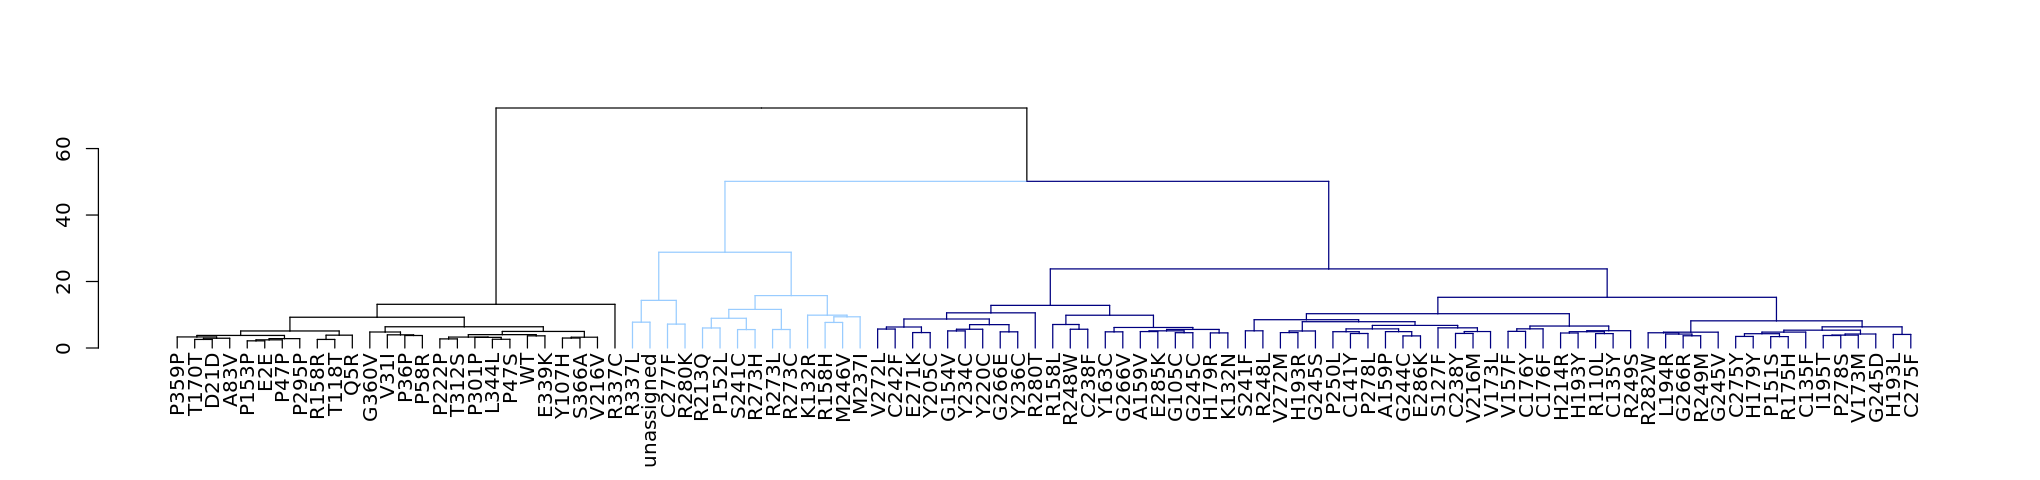

In [14]:
options(repr.plot.width=17, repr.plot.height=4)
d1 <- color_branches(dend, 3, col = c('black','#99CCFF','navy'))
plot(d1)

In [15]:
options(repr.plot.width=17, repr.plot.height=4)
f_pref='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2020-09-15_Figures/TP53'
pdf(paste(f_pref,'.dendrogram.pdf',sep=''))
d1 <- color_branches(dend, 3, col = c('black','#99CCFF','navy'))
print(plot(d1))
dev.off()
print(paste(f_pref,'.dendrogram.pdf',sep=''))

NULL


png 
  2

[1] "/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2020-09-15_Figures/TP53.dendrogram.pdf"


In [16]:
par('mar')
par(mar=c(1,1,1,1))

[1] 5.1 4.1 4.1 2.1

In [17]:
dev.off()
f_pref='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/2020-09-15_Figures/TP53'
png(paste(f_pref,'.dendrogram.png',sep=''),width=1,height=1)
d1 <- color_branches(dend, 3, col = c('black','#99CCFF','navy'))
print(plot(d1))
dev.off()
print(paste(f_pref,'.dendrogram.png',sep=''))

null device 
          1

ERROR: Error in plot.new(): figure margins too large


In [18]:
png()
dev.off()

png 
  2

In [19]:
sorted_variants=rownames(x)[order.dendrogram(dend)]
sorted_variants_df=data.frame(variant=sorted_variants,
                              color=get_leaves_branches_col(d1))

In [20]:
res='/ahg/regevdata/projects/bn10_cancer_variants/bn10_oana_2018-06-22/results/2018-06-22/results/2020-02-14/TP53/clustering/TP53.corrL1.sorted_variants.csv'
write.table(sorted_variants_df,res,sep=',',quote=FALSE,row.names=FALSE,col.names=FALSE)